In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r'cnc.csv')
df.head()

,Feed Rate,Rotational Rate,Depth of cut,Surface Roughness
0,0.15,1250,0.6,1.69
1,0.30,1000,0.4,1.47
2,0.15,750,0.2,1.91
3,0.30,1000,0.4,1.47
4,0.15,1000,0.4,1.77


In [3]:
df.shape

(16, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Feed rate          16 non-null     int64  
 1   Spindle speed      16 non-null     int64  
 2   Depth of cut       16 non-null     float64
 3   Width of cut       16 non-null     float64
 4   Cutting direction  16 non-null     object 
 5   Coolant            16 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 896.0+ bytes


In [5]:
df.describe()

,Feed rate,Spindle speed,Depth of cut,Width of cut
count,16.000000,16.000000,16.000000,16.00000
mean,1100.000000,2500.000000,2.000000,0.80000
std,692.820323,1154.700538,1.154701,0.46188
min,200.000000,1000.000000,0.500000,0.20000
25%,650.000000,1750.000000,1.250000,0.50000
50%,1100.000000,2500.000000,2.000000,0.80000
75%,1550.000000,3250.000000,2.750000,1.10000
max,2000.000000,4000.000000,3.500000,1.40000


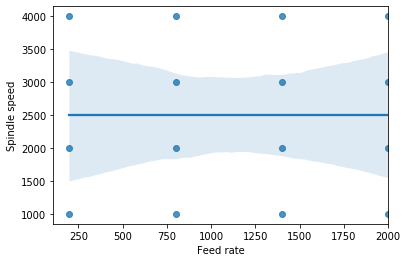

In [7]:
sns.regplot(x='Feed rate',y='Spindle speed',data=df)

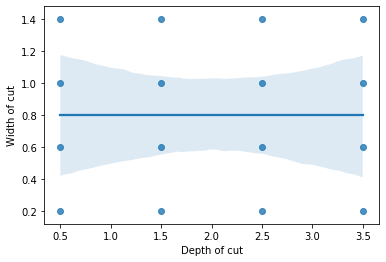

In [8]:
sns.regplot(x='Depth of cut',y='Width of cut',data=df)

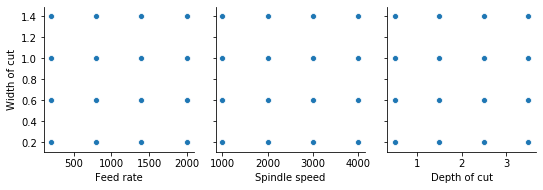

In [9]:
sns.pairplot(data=df,
             x_vars=['Feed rate','Spindle speed','Depth of cut'],
             y_vars='Width of cut')

In [10]:
df.corr()

,Feed rate,Spindle speed,Depth of cut,Width of cut
Feed rate,1.000000e+00,0.000000e+00,0.000000e+00,-4.440892e-18
Spindle speed,0.000000e+00,1.000000e+00,0.000000e+00,-1.065814e-17
Depth of cut,0.000000e+00,0.000000e+00,1.000000e+00,-6.938894e-18
Width of cut,-4.440892e-18,-1.065814e-17,-6.938894e-18,1.000000e+00


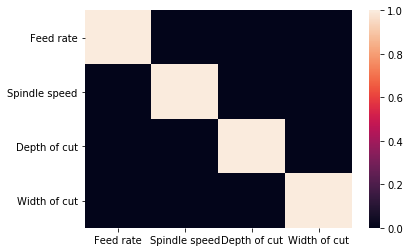

In [11]:
sns.heatmap(df.corr())

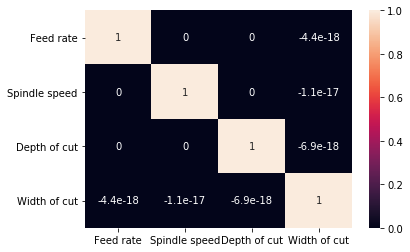

In [12]:
sns.heatmap(df.corr(),annot=True)

In [14]:
#Steps
# 1 Create x and y
# 2 Create train and test sets 
# 3 Train your model on the training set
# 4 Evaluate the model (training set,test set)

In [13]:
df.head()

,Feed rate,Spindle speed,Depth of cut,Width of cut,Cutting direction,Coolant
0,1400,3000,0.5,0.6,Down,Off
1,2000,4000,0.5,1.0,Down,On
2,800,2000,0.5,1.4,Up,Off
3,200,1000,0.5,0.2,Up,On
4,200,2000,1.5,1.0,Down,Off


In [14]:
X = df['Feed rate']
y = df['Spindle speed']

In [15]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70, random_state=100)
#X_train, X_test, y_train, y_test
X_train.shape
X_test.shape

(5,)

In [16]:
X_train

6     2000
14     200
5      800
2      800
4      200
0     1400
12    2000
7     1400
3      200
15     800
8      800
Name: Feed rate, dtype: int64

In [17]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()


,const,Feed rate
6,1.0,2000
14,1.0,200
5,1.0,800
2,1.0,800
4,1.0,200


In [18]:
# fitting the model
# ols-ordinary least squares
lr = sm.OLS(y_train, X_train_sm)#creates a linear regression object
lr_model = lr.fit()
lr_model.params

const        2497.512438
Feed rate       0.049751
dtype: float64

In [20]:
# sales = 6.94+0.05TV
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Spindle speed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                  0.006638
Date:                Thu, 06 Jan 2022   Prob (F-statistic):              0.937
Time:                        12:51:37   Log-Likelihood:                -93.195
No. Observations:                  11   AIC:                             190.4
Df Residuals:                       9   BIC:                             191.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2497.5124    703.481      3.550      0.006     906.127    4088.898
Feed rate      0.0498      0.611      0.081      0.937      -1.332       1.431
==============================================================================
Omnibus:                        2.420   Durbin-Watson:                   2.655
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                0.934
Skew:                          -0.104   Prob(JB):                        0.627
Kurtosis:                       1.588   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""